# 08 熊貓數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。

In [1]:
from IPython.display import YouTubeVideo

In [2]:
YouTubeVideo("https://youtu.be/9d5-Ti6onew")

#### 準備套件

我們來看幾乎以後都是標準的引入套件, 這次當然增加了引入 `pandas`。

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 08-1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [4]:
df = pd.read_csv("grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [5]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 08-2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [6]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
5     13
6     11
7      8
8      9
9     10
10    14
11    13
12    11
13    15
14     8
15    11
16    14
17    12
18     9
19    14
20    13
21     9
22    12
23    10
24    10
25    13
26    13
27     8
28    15
29    14
      ..
70     9
71     9
72    10
73    13
74    14
75    13
76     9
77    13
78    12
79     9
80    13
81    11
82    11
83    10
84    10
85    10
86    11
87    10
88    11
89    13
90     8
91    14
92     8
93    11
94    10
95     9
96     8
97    14
98    15
99     9
Name: 國文, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [7]:
df.國文

0      9
1     10
2     13
3     10
4     13
5     13
6     11
7      8
8      9
9     10
10    14
11    13
12    11
13    15
14     8
15    11
16    14
17    12
18     9
19    14
20    13
21     9
22    12
23    10
24    10
25    13
26    13
27     8
28    15
29    14
      ..
70     9
71     9
72    10
73    13
74    14
75    13
76     9
77    13
78    12
79     9
80    13
81    11
82    11
83    10
84    10
85    10
86    11
87    10
88    11
89    13
90     8
91    14
92     8
93    11
94    10
95     9
96     8
97    14
98    15
99     9
Name: 國文, dtype: int64

#### 資料畫出來

要畫個圖很容易。

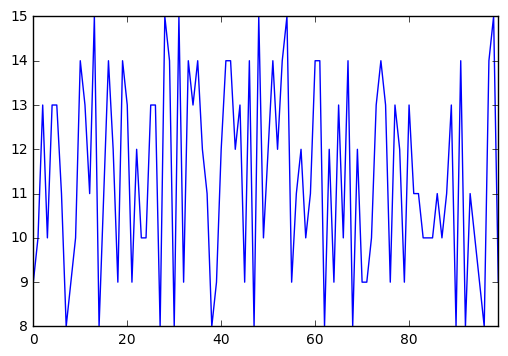

In [8]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

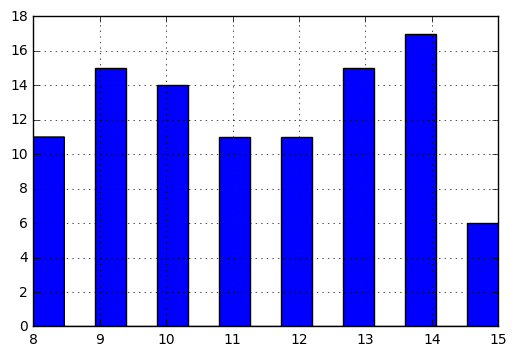

In [9]:
df.國文.hist(bins=15)

## 08-3 一些基本的資料分析

算平均。

In [10]:
df.國文.mean()

11.39

算標準差。

In [11]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [12]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [13]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [14]:
df.國文.corr(df.數學)

-0.31089898221793311

## 08-4 手工打造一個 DataFrame

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [15]:
mydata = np.random.randn(4,3)

In [16]:
mydata

array([[ 0.15521252,  0.97934249,  0.34267215],
       [ 0.59882935,  0.18311593,  1.76097643],
       [ 0.64171534, -0.28273844,  1.62997553],
       [-0.33948626,  1.64623964, -0.22692633]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [17]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [18]:
df2

,A,B,C
0,0.155213,0.979342,0.342672
1,0.598829,0.183116,1.760976
2,0.641715,-0.282738,1.629976
3,-0.339486,1.646240,-0.226926


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [19]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [20]:
df3

,A,B,C
0,0.571494,-1.153108,1.104366
1,1.368999,1.338462,0.574410
2,1.316672,-1.047993,0.403293


In [21]:
df4 = pd.concat([df2, df3], axis=0)

In [22]:
df4

,A,B,C
0,0.155213,0.979342,0.342672
1,0.598829,0.183116,1.760976
2,0.641715,-0.282738,1.629976
3,-0.339486,1.646240,-0.226926
0,0.571494,-1.153108,1.104366
1,1.368999,1.338462,0.574410
2,1.316672,-1.047993,0.403293


前面我們弄得亂七八糟的 index 重設一下。

In [23]:
df4.index = range(7)

In [24]:
df4

,A,B,C
0,0.155213,0.979342,0.342672
1,0.598829,0.183116,1.760976
2,0.641715,-0.282738,1.629976
3,-0.339486,1.646240,-0.226926
4,0.571494,-1.153108,1.104366
5,1.368999,1.338462,0.574410
6,1.316672,-1.047993,0.403293


#### 横向的貼

In [25]:
df5 = pd.concat([df2, df3], axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [26]:
df5

,A,B,C,A,B,C
0,0.155213,0.979342,0.342672,0.571494,-1.153108,1.104366
1,0.598829,0.183116,1.760976,1.368999,1.338462,0.574410
2,0.641715,-0.282738,1.629976,1.316672,-1.047993,0.403293
3,-0.339486,1.646240,-0.226926,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [27]:
df_names = pd.read_csv('names.csv', names=["姓名"])

In [28]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [29]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)), 
                      columns=["國文", "英文", "數學", 
                               "社會", "自然"])

In [30]:
df6 = pd.concat([df_names, df_grades], axis=1)

In [31]:
df6.head()

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,8,12,12,14,13
1,王紹尹,12,14,7,7,10
2,黃季坤,14,13,11,11,6
3,許正書,14,14,10,9,13
4,張鈞蓮,6,11,13,10,6


## 08-5 做些簡單的計算

我們先來計算總級分。基本上就是挑出要算的部份 (我們的例子就是所有科目), 再來就是全部加起來。其實全部加起來有個模糊的地方: 要一列一列加起來 (0), 還是一行一行加起來 (1)。

In [32]:
df6["總級分"] = df6[["國文", "英文", "數學", "社會", "自然"]].sum(1)

In [33]:
df6.head()

,姓名,國文,英文,數學,社會,自然,總級分
0,羅雅慧,8,12,12,14,13,59
1,王紹尹,12,14,7,7,10,50
2,黃季坤,14,13,11,11,6,55
3,許正書,14,14,10,9,13,60
4,張鈞蓮,6,11,13,10,6,46


#### 某種主科加權

現在有個系可能想看

    數學 x 1.5 + 英文
    
這樣的分數。怎麼算很容易。

In [34]:
df6["主科"] = df6.數學 * 1.5 + df6.英文

In [35]:
df6.head()

,姓名,國文,英文,數學,社會,自然,總級分,主科
0,羅雅慧,8,12,12,14,13,59,30.0
1,王紹尹,12,14,7,7,10,50,24.5
2,黃季坤,14,13,11,11,6,55,29.5
3,許正書,14,14,10,9,13,60,29.0
4,張鈞蓮,6,11,13,10,6,46,30.5


#### 排排序

我們來看總級分最高的 20 位同學。

In [36]:
df6.sort_values(by=["總級分"], ascending=False).head(20)

,姓名,國文,英文,數學,社會,自然,總級分,主科
93,呂建中,15,14,15,12,12,68,36.5
57,張靜如,6,14,15,14,14,63,36.5
29,李千惠,12,15,15,9,11,62,37.5
47,鄭科季,14,9,14,10,15,62,30.0
80,陳偉翔,11,12,13,15,11,62,31.5
67,丁佳伶,13,12,14,10,12,61,33.0
43,黃綺恆,13,13,14,11,10,61,34.0
35,吳佳慧,15,12,10,14,10,61,27.0
3,許正書,14,14,10,9,13,60,29.0
55,林君鑫,12,10,14,15,8,59,31.0


先看主科, 再比總級分!

In [37]:
df6.sort_values(by=["主科", "總級分"], ascending=False).head(20)

,姓名,國文,英文,數學,社會,自然,總級分,主科
29,李千惠,12,15,15,9,11,62,37.5
93,呂建中,15,14,15,12,12,68,36.5
57,張靜如,6,14,15,14,14,63,36.5
86,邱美玲,11,15,14,9,8,57,36.0
43,黃綺恆,13,13,14,11,10,61,34.0
89,張靖雯,13,11,15,6,7,52,33.5
67,丁佳伶,13,12,14,10,12,61,33.0
72,許家文,6,12,14,15,11,58,33.0
90,吳建銘,11,12,14,7,9,53,33.0
19,刁穎春,7,13,13,11,10,54,32.5


## 08-6 用實際資料來玩 `pandas`!

我們這裡借用 Julia Evans "Pandas Cookbook" 裡面的資料來玩玩!

<a href="https://github.com/jvns/pandas-cookbook/tree/master/data">Pandas Cookbook</a>

去下載 Montreal 官方的單車各路線使用狀況, 要 2012 年的哦。

<a href="http://donnees.ville.montreal.qc.ca/dataset/velos-comptage">下載網頁</a>

我們這存成了 `2012.csv`。

In [38]:
df_bike = pd.read_csv("2012.csv",
                      index_col="Date", 
                      parse_dates=True, dayfirst=True)

In [39]:
df_bike.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


這裡說的是每個一天, 每個腳踏車道有多少人使用。

#### 縮小一點的表格

我們來縮小成三條路線的 DataFrame。

In [40]:
df_sbike = df_bike[["Berri 1", "Côte-Sainte-Catherine", 
                    "Maisonneuve 1"]].copy()

這裡的結尾多個神秘的 `.copy()` 是什麼意思呢? 這是說我們想要把 `df_sbike` 從原本所有的資料中 copy 出一個新的 DataFrame, 而不是只在原來的 DataFrame 取出一部份工作。這樣我們對 `df_sbkie` 的修改都不會影響到原來的東西。

其實沒有這麼做也不會怎樣, 只是會得到一個叫 SettingWithCopyWarning 的警告。想瞭解到底發生什麼事可參考下面的影片。

In [41]:
YouTubeVideo("https://youtu.be/4R4WsDJ-KVc")

順道一提, 類似這樣的「小問題」常常讓我們用 `pandas` 時有許多挫折感, 上面的影片其實是一系列 `pandas` Q&A 其中之一。非常棒! 極力推薦大家看看, 尤其選擇不太明白的主題。

In [42]:
df_sbike.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-02,83,1,68
2012-01-03,135,2,104
2012-01-04,144,1,116
2012-01-05,197,2,124


#### 三條路線畫圖比較

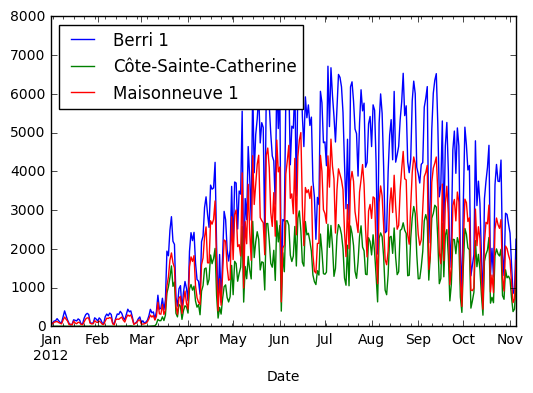

In [43]:
df_sbike.plot()

然後我們可以做各種分析。

#### [Q1] 哪條路線最受歡迎?

In [44]:
df_sbike.mean()

Berri 1                  2985.048387
Côte-Sainte-Catherine    1233.351613
Maisonneuve 1            1983.325806
dtype: float64

看中位數、畫個圖也不錯。

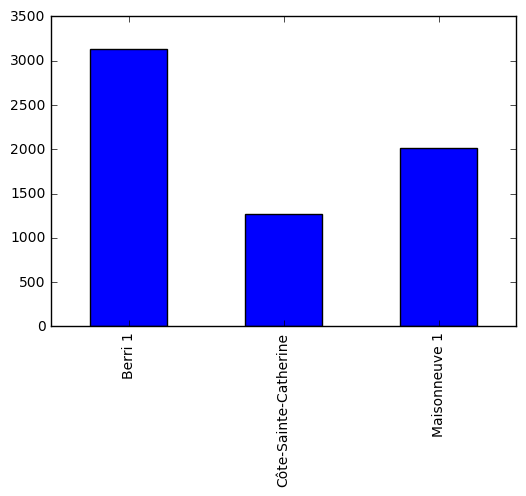

In [45]:
df_sbike.median().plot(kind="bar")

#### [Q2] 哪些是最可怕的日子 (沒什麼人在騎單車)?

In [46]:
df_sbike['Berri 1']<75

Date
2012-01-01     True
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
2012-01-06    False
2012-01-07    False
2012-01-08    False
2012-01-09    False
2012-01-10    False
2012-01-11    False
2012-01-12    False
2012-01-13    False
2012-01-14     True
2012-01-15     True
2012-01-16    False
2012-01-17    False
2012-01-18    False
2012-01-19    False
2012-01-20    False
2012-01-21     True
2012-01-22     True
2012-01-23    False
2012-01-24    False
2012-01-25    False
2012-01-26    False
2012-01-27    False
2012-01-28    False
2012-01-29    False
2012-01-30    False
              ...  
2012-10-07    False
2012-10-08    False
2012-10-09    False
2012-10-10    False
2012-10-11    False
2012-10-12    False
2012-10-13    False
2012-10-14    False
2012-10-15    False
2012-10-16    False
2012-10-17    False
2012-10-18    False
2012-10-19    False
2012-10-20    False
2012-10-21    False
2012-10-22    False
2012-10-23    False
2012-10-24    False
2012-10-25    F

In [47]:
df_sbike[df_sbike['Berri 1']<75]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Date,,,
2012-01-01,35,0,38
2012-01-14,32,0,54
2012-01-15,54,0,33
2012-01-21,53,0,47
2012-01-22,71,0,41
2012-02-05,72,0,46
2012-02-11,71,0,63
2012-02-25,62,0,48


#### [Q3] 大家都是週末還是平日騎車呢?

In [48]:
df_sbike["weekday"] = df_sbike.index.weekday

In [49]:
df_sbike.tail()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday
Date,,,,
2012-11-01,2405,1208,1701,3
2012-11-02,1582,737,1109,4
2012-11-03,844,380,612,5
2012-11-04,966,446,710,6
2012-11-05,2247,1170,1705,0


In [50]:
counts_by_day = df_sbike.groupby("weekday").aggregate(sum)

In [51]:
counts_by_day

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
weekday,,,
0,134298,60329,90051
1,135305,58708,92035
2,152972,67344,104891
3,160131,69028,111895
4,141771,56446,98568
5,101578,34018,62067
6,99310,36466,55324


#### 修改 index

我們準備畫出大家最愛在哪些天騎車, 我們當然不想用 0, 1, 2, ... 代表星期幾, 於是我們把這些都換成「人話」。

In [52]:
counts_by_day.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [53]:
counts_by_day

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1
Mon,134298,60329,90051
Tue,135305,58708,92035
Wed,152972,67344,104891
Thu,160131,69028,111895
Fri,141771,56446,98568
Sat,101578,34018,62067
Sun,99310,36466,55324


然後我們來畫畫 Berri 1 這條線大家使用情況:

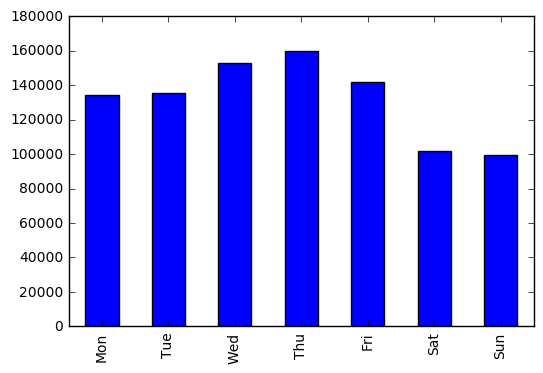

In [54]:
counts_by_day["Berri 1"].plot(kind='bar')

#### [Q4] 冷暖會不會影響騎車意願?

In [55]:
df_weather = pd.read_csv("weather_2012.csv", 
                         index_col="Date/Time", 
                         parse_dates=True)

In [56]:
df_weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


我要一天的平均溫度!!

In [57]:
df_sbike["mean temp"] = df_weather["Temp (C)"].resample('D').apply(np.mean)

In [58]:
df_sbike.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean temp
Date,,,,,
2012-01-01,35,0,38,6,0.629167
2012-01-02,83,1,68,0,0.041667
2012-01-03,135,2,104,1,-14.416667
2012-01-04,144,1,116,2,-13.645833
2012-01-05,197,2,124,3,-6.750000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x117cbf7b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118a31390>], dtype=object)

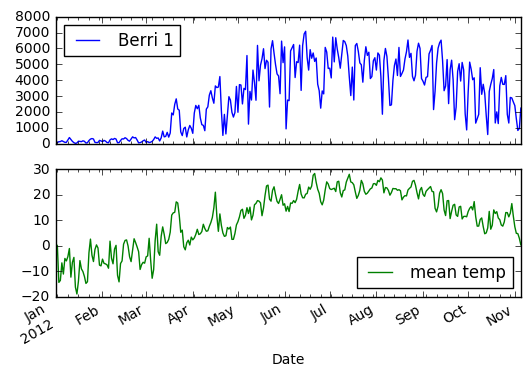

In [59]:
df_sbike[["Berri 1", "mean temp"]].plot(subplots=True)

#### [Q5] 下雨天就不騎車了吧?

In [60]:
df_sbike["Rain"] = df_weather["Weather"].str.contains("Rain").resample("D").apply(np.mean)

In [61]:
df_sbike.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean temp,Rain
Date,,,,,,
2012-01-01,35,0,38,6,0.629167,0.125000
2012-01-02,83,1,68,0,0.041667,0.041667
2012-01-03,135,2,104,1,-14.416667,0.000000
2012-01-04,144,1,116,2,-13.645833,0.000000
2012-01-05,197,2,124,3,-6.750000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11871d160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118815518>], dtype=object)

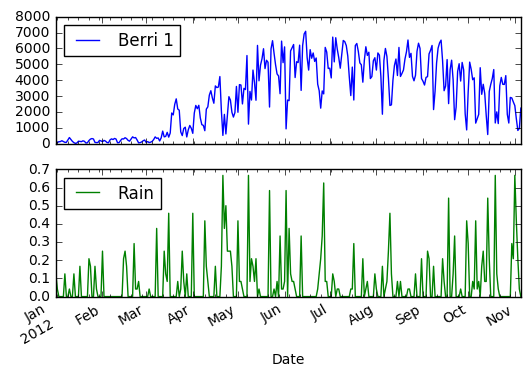

In [62]:
df_sbike[["Berri 1", "Rain"]].plot(subplots=True)

In [63]:
df_sbike.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

In [64]:
df_sbike["weekday"] = df_sbike.index.weekday

In [65]:
df_sbike.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean temp,Rain
Date,,,,,,
2012-01-01,35,0,38,6,0.629167,0.125000
2012-01-02,83,1,68,0,0.041667,0.041667
2012-01-03,135,2,104,1,-14.416667,0.000000
2012-01-04,144,1,116,2,-13.645833,0.000000
2012-01-05,197,2,124,3,-6.750000,0.000000


In [66]:
berri = df_sbike[["Berri 1", "weekday"]]

In [67]:
berri.head()

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [68]:
weekday_counts = berri.groupby("weekday").aggregate(sum)

In [69]:
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [70]:
weekday_counts.index = ["Mon", "Tue", "Wed", "Thu", 
                        "Fri", "Sat", "Sun"]

In [71]:
weekday_counts

,Berri 1
Mon,134298
Tue,135305
Wed,152972
Thu,160131
Fri,141771
Sat,101578
Sun,99310


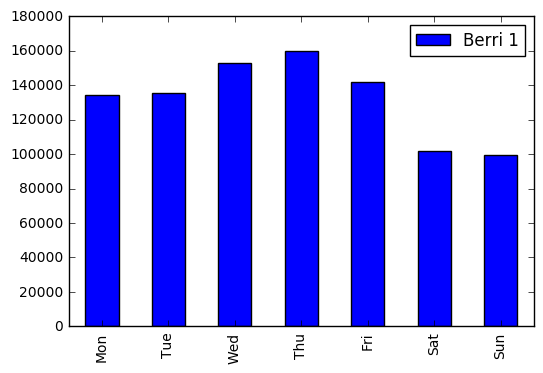

In [72]:
weekday_counts.plot(kind='bar')

In [73]:
df_sbike["Berri 1"] < 80

Date
2012-01-01     True
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
2012-01-06    False
2012-01-07    False
2012-01-08    False
2012-01-09    False
2012-01-10    False
2012-01-11    False
2012-01-12    False
2012-01-13     True
2012-01-14     True
2012-01-15     True
2012-01-16    False
2012-01-17    False
2012-01-18    False
2012-01-19    False
2012-01-20    False
2012-01-21     True
2012-01-22     True
2012-01-23    False
2012-01-24    False
2012-01-25    False
2012-01-26    False
2012-01-27    False
2012-01-28    False
2012-01-29    False
2012-01-30    False
              ...  
2012-10-07    False
2012-10-08    False
2012-10-09    False
2012-10-10    False
2012-10-11    False
2012-10-12    False
2012-10-13    False
2012-10-14    False
2012-10-15    False
2012-10-16    False
2012-10-17    False
2012-10-18    False
2012-10-19    False
2012-10-20    False
2012-10-21    False
2012-10-22    False
2012-10-23    False
2012-10-24    False
2012-10-25    F

In [74]:
df_sbike[df_sbike["Berri 1"] < 80]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,weekday,mean temp,Rain
Date,,,,,,
2012-01-01,35,0,38,6,0.629167,0.125000
2012-01-13,75,0,41,4,-4.600000,0.125000
2012-01-14,32,0,54,5,-16.295833,0.000000
2012-01-15,54,0,33,6,-18.983333,0.000000
2012-01-21,53,0,47,5,-14.833333,0.000000
2012-01-22,71,0,41,6,-14.166667,0.000000
2012-02-05,72,0,46,6,-8.850000,0.000000
2012-02-11,71,0,63,5,-11.637500,0.000000
2012-02-12,78,0,36,6,-14.220833,0.000000


#### Julia Evans 很棒的 pandas 介紹影片!

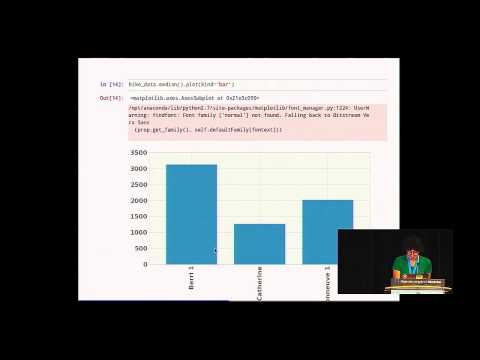

In [75]:
YouTubeVideo("rEalbu8UGeo")